In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3*64*64, 256)
        self.fc2 = nn.Linear(256, 2)

    def forward(self, x):
        x = x.view(-1, 3*64*64)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [ ]:
import torch
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.Resize((64,64)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = datasets.ImageFolder(root='FACE/train', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)


In [ ]:
for epoch in range(10): 
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, loss: {running_loss / len(trainloader)}")

print('Finished Training')


Epoch 1, loss: 0.7383714616298676
Epoch 2, loss: 0.4963565468788147
Epoch 3, loss: 0.3253733664751053
Epoch 4, loss: 0.21733489260077477
Epoch 5, loss: 0.13525142520666122
Epoch 6, loss: 0.09211572539061308
Epoch 7, loss: 0.06322170700877905
Epoch 8, loss: 0.04785429406911135
Epoch 9, loss: 0.035586188081651926
Epoch 10, loss: 0.029390369541943073
Finished Training


In [ ]:
classes = trainset.classes
print(classes)


['abdulkalam', 'dhoni']


dhoni


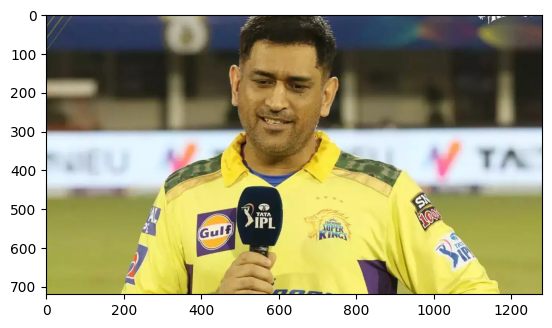

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
img = Image.open("/content/drive/MyDrive/FACE/test/dhoni/91693052.webp")
plt.imshow(img)
transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
img = transform(img)
img = img.unsqueeze(0)
net.eval()
output = net(img)
_, predicted_class = torch.max(output.data,1)
classes = trainset.classes
print(classes[predicted_class])

